In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from scipy.stats import shapiro, levene

## ETL: Extract, Transform, Load

ETL is a vital data integration process with three key stages:

- **Extract**: Gather data from databases, files, or web services.
- **Transform**: Clean, structure, and prepare data for analysis.
- **Load**: Store data in a data warehouse or database for querying.

ETL ensures data is well-organized, clean, and ready for efficient analysis, making it essential for data projects and system integration.


In [76]:
df = pd.read_csv("/home/jony/Proyects/test_cat/cookie_cats.csv").drop("userid", axis=1)

In [77]:
df.head()

,version,sum_gamerounds,retention_1,retention_7
0,gate_30,3,False,False
1,gate_30,38,True,False
2,gate_40,165,True,False
3,gate_40,1,False,False
4,gate_40,179,True,True


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   version         90189 non-null  object
 1   sum_gamerounds  90189 non-null  int64 
 2   retention_1     90189 non-null  bool  
 3   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(1), object(1)
memory usage: 1.5+ MB


In [79]:
df.describe()

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


In [80]:
df.groupby('version')['sum_gamerounds'].agg(['count','mean','median','min','max'])

,count,mean,median,min,max
version,,,,,
gate_30,44700,52.456264,17.0,0,49854
gate_40,45489,51.298776,16.0,0,2640


## Managing Outliers in Game Rounds Analysis

When comparing the mean and the median of the "sum_gamerounds" data, we observe a significant difference between them. This discrepancy indicates that outliers, which are extreme values in the dataset, have a noticeable impact on the mean while the median remains relatively unaffected.

To effectively manage these outliers, we first identify them using statistical thresholds based on the data's distribution:


In [81]:
# Calculate percentiles and IQR
seventy_fifth = df['sum_gamerounds'].quantile(0.75)
twenty_fifth = df['sum_gamerounds'].quantile(0.25)
gamerounds_iqr = seventy_fifth - twenty_fifth

In [82]:
# Define upper and lower thresholds
upper = seventy_fifth + (1.5 * gamerounds_iqr)
lower = twenty_fifth - (1.5 * gamerounds_iqr)
print("Upper Threshold:", upper)
print("Lower Threshold:", lower)

Upper Threshold: 120.0
Lower Threshold: -64.0


#### Calculate percentage of outliers

In [83]:
outliers_percent = len(df[df['sum_gamerounds'] > upper]) / len(df) * 100
print("Percentage of Outliers:", outliers_percent)

Percentage of Outliers: 11.284081207242568


In [91]:
outliers_lower_percent = len(df[df['sum_gamerounds'] < lower]) / len(df) * 100
print("Percentage of Outliers:", outliers_lower_percent)

Percentage of Outliers: 0.0


These thresholds help us identify values that lie significantly beyond the typical range observed in the data.

#### Considerations before removing outliers:

- **Distribution of the data**: If the data follows a normal or nearly normal distribution, removing 11% of the data could eliminate some extreme but valid values. This could affect how we perceive the dataset overall.

- **Impact on analysis**: Removing a large portion of the dataset, especially if it's not very large to begin with, can significantly affect future analyses. It's important to consider whether removing extreme values is truly necessary for the analysis goals and if there are alternative ways to handle them.

- **Interpreting each extreme value**: It's important to understand whether extreme values are genuinely rare or simply data points that are unusually high or low. Sometimes, these extreme values can provide valuable insights into special user behaviors or specific conditions worth considering.

## Scatter Plot of Sum of Game Rounds (Original Data)

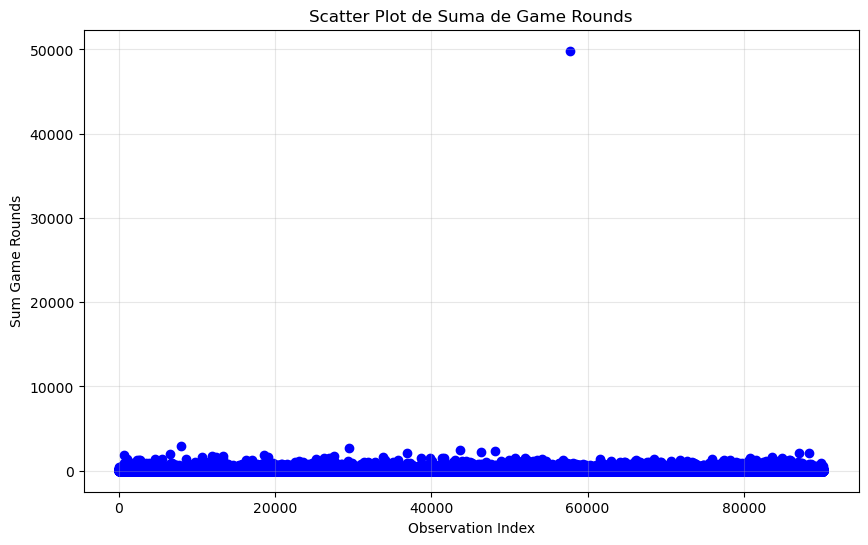

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.scatter(df.index, df['sum_gamerounds'], marker='o', color='blue')

ax.set_title('Scatter Plot de Suma de Game Rounds')
ax.set_xlabel('Observation Index')
ax.set_ylabel('Sum Game Rounds')
ax.grid(True, alpha=0.3)

## Scatter Plot of Sum of Game Rounds (Cleaned Data)

In [86]:
df_clean = df[(df['sum_gamerounds'] >= lower) & (df['sum_gamerounds'] <= upper)]

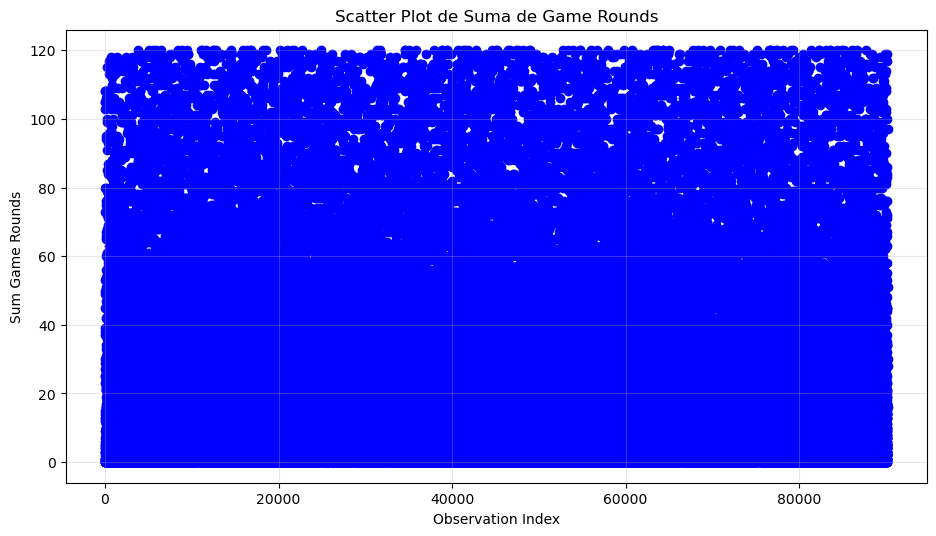

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))


ax.scatter(df_clean.index, df_clean['sum_gamerounds'], marker='o', color='blue')

ax.set_title('Scatter Plot de Suma de Game Rounds')
ax.set_xlabel('Observation Index')
ax.set_ylabel('Sum Game Rounds')
ax.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)